# Search Experiments

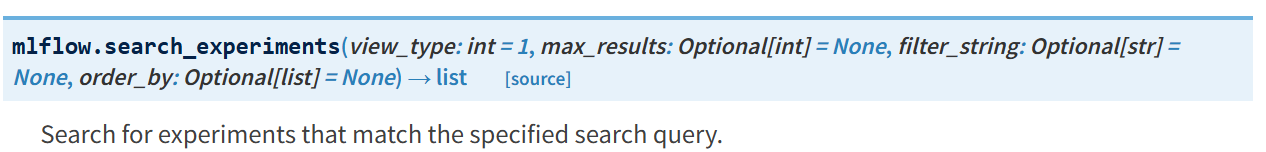

In [1]:
import mlflow
from mlflow_for_ml_dev.src.utils.experiment_batch import create_experiments_batch
from mlflow_for_ml_dev.src.utils.experiment_batch import delete_experiments_batch

In [2]:

experiment_ids = create_experiments_batch(20)
delete_experiments_batch(experiment_ids[0:5])        

In [ ]:
all_experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ALL)
print(f"All Experiments: {len(all_experiments)}\n")
for experiment in all_experiments:
    
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name)
    print("\n")

In [ ]:
active_experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY)

print(f"Active Experiments: {len(active_experiments)} \n")
for experiment in active_experiments:
    
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name)
    print("\n")

In [ ]:
deleted_experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.DELETED_ONLY)

print(f"Deleted Experiments: {len(deleted_experiments)} \n")
for experiment in deleted_experiments:
    
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name)
    print("\n")

We can use the parameter `max_results` to limit the results

In [ ]:
active_experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY, max_results=4)
print(f"Deleted Experiments: {len(active_experiments)} \n")
for experiment in active_experiments:
    
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name)
    print("\n")

**Order By**

The following fields are supported:

* experiment_id: Experiment ID

* name: Experiment name

* creation_time: Experiment creation time


In [ ]:
active_experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY, max_results=2, order_by=["creation_time DESC"])
print(f"Active experiments: {len(active_experiments)}\n")
for experiment in active_experiments:
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name)
    print("\n")


**Filter String**

In [ ]:
experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ALL, max_results=2, filter_string="name = 'experiment_1'")
print(f"Experiments: {len(experiments)}\n")
for experiment in experiments:
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name)
    print("\n")

It is possible to combine multiple conditions, and use multiple string operators

* Operator: = (Equal to)

In [ ]:
experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY,
                                        max_results=10,
                                        filter_string="tags.project_type = 'production' AND tags.inference_type = 'batch'",
                                        order_by=["last_update_time ASC"]
                                    )
print(f"Experiments: {len(experiments)}\n")
for experiment in experiments:
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name, experiment.tags)
    print("\n")

* Operator: != (not equal)

In [ ]:
experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY,
                                        max_results=10,
                                        filter_string="tags.project_type != 'production' AND tags.inference_type = 'batch'",
                                        order_by=["last_update_time ASC"]
                                    )
print(f"Experiments: {len(experiments)}\n")
for experiment in experiments:
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name, experiment.tags)
    print("\n")

* Operator: LIKE ( Case-sensitive pattern match)

In [ ]:
experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY,
                                        max_results=10,
                                        filter_string="tags.project_type != 'research' AND tags.data_type LIKE 'semi%'",
                                        order_by=["last_update_time ASC"]
                                    )
print(f"Experiments: {len(experiments)}\n")
for experiment in experiments:
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name, experiment.tags)
    print("\n")

* Operator: ILIKE (Case-insensitive pattern match)

In [ ]:
experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY,
                                        max_results=10,
                                        filter_string="tags.project_type != 'research' AND tags.data_type ILIKE 'sEMi%'",
                                        order_by=["last_update_time ASC"]
                                    )
print(f"Experiments: {len(experiments)}\n")
for experiment in experiments:
    print(experiment.lifecycle_stage, experiment.experiment_id, experiment.name, experiment.tags)
    print("\n")